<!-- JPN -->
# 主成分分析 (principal component analysis; PCA)

※本演習資料の二次配布・再配布はお断り致します。


<!-- ENG -->
# Principal component analysis (PCA)

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.


<!-- JPN -->
　データの各変数は、互いに相関がある。例えば、7月19日と言われれば夏の暑い時期を思い浮かべるだろうし、12月15日と言われれば寒い冬を思い浮かべるだろう。あるいは、天気が晴れていると言われれば暖かそうだし、雨が降っているなら寒そうである。雪と言われれば、気温が低いことは自明だろう。そんな、「日付」「天候」「気温」といった、**関連しあう複数の変数を、より少ない変数に削減（射影）しようとするのが主成分分析 (principal component analysis; PCA)** である。

<!-- ENG -->
　Each variable in data is correlated with each other. For example, if you say July 19, you may think of the hot summer season, and if you say December 15, you may think of the cold winter. Or, if the weather is said to be sunny, it seems warm, and if it is raining, it seems cold. If it is snow, it will be obvious that the temperature is low. **Principal component analysis (PCA) is an attempt to reduce the number of related variables (by projecting multiple variables to a lower-dimensional space)**, such as "date," "weather," and "temperature".

<!-- JPN -->
　今回は、手書き文字データを利用して、次元削減するとどういう変数が生まれるのか、削減後から削減前をどの程度再現できるのか、そして主成分分析と線形代数の関係を以下の4つのセクションに分けて説明していく。

<!-- ENG -->
　In this exercise, we are going to use handwritten character string data to explain what kind of variables are created by dimension reduction, to what extent the original data can be reproduced after dimension reduction, and the relationship between PCA and linear algebra in the following four sections.

<!-- JPN -->
- **1 | digitsデータセット**
- **2 | 主成分分析のdigitsデータセットへの適用**
- **3 | 主成分からの再構築**
- **4 | 主成分分析における分散共分散行列の固有値**


<!-- ENG -->
- **1 | Digits data set**
- **2 | Applying PCA to the digits data set**
- **3 | Reconstruction from principal components**
- **4 | Eigenvalues ​​of the variance-covariance matrix in PCA**


<!-- JPN -->
## 1 | digitsデータセット

<!-- ENG -->
## 1 | Digits data set

<!-- JPN -->
　本演習では手書き文字認識のデータ digits を用いる。digits は手書きの数字（0〜9）1文字の白黒画像と、対応する正しい数字からなるデータセットである。

<!-- ENG -->
　Here, we use digits data, which is handwritten character string recognition. Digits is a data set consisting of a black and white image of a single handwritten number (0-9) and the corresponding correct number.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

d = datasets.load_digits()

<!-- JPN -->
まずは、どのような情報が含まれているデータなのか見てみよう。

`dir()`関数は、引数が持っているデータの一覧を取得することができる。

<!-- ENG -->
First, let's take a look at what kind of information the data contains.

The `dir()` function can get a list of the data that its argument has.

In [2]:
print(dir(d))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


<!-- JPN -->
それぞれ、`DESCR` はデータセットの説明（description）、`data` はベクトル形式の画像データ、`images` は画像形式の画像データ、`target` は画像に対応する0〜9の数字、`target_names` はtargetの一覧 (`[0, 1, ..., 9]`) である。

<!-- ENG -->
`DESCR` is the description of the data set, `data` is the image data in vector format, `images` is the image data in image format, `target` is the number from 0-9 corresponding to the image, and `target_names` is the list of targets (`[0, 1, ..., 9]`).

<!-- JPN -->
画像に相当する入力データ `d.data` は、各行が画像1枚に相当し、各列に画像の各ピクセルに対応する値を並べた行列である。今回の入力画像は8x8の解像度なので、列数は64である。

<!-- ENG -->
The input data `d.data` which corresponds to an image is a matrix in which each row corresponds to one image and each column contains the values corresponding to each pixel of the image. The input image in this case has a resolution of 8x8, so the number of columns is 64.

In [3]:
data = d.data
print(data.shape[1]) # show the number of columns of data
print(data) # show data

64
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


<!-- JPN -->
画像に相当するデータ `images` はarrayのリストのような形式で保存されている。

さて、画像と数字を対応させて表示してみよう。下のセルで、変数 `image_index` で指定する番号の画像を表示できる。

<!-- ENG -->
The data `images` that correspond to the images are stored in a format like an array list.

Now, let's try to display the image and number correspondence. In the cell below, the image of the number specified by the variable `image_index` can be displayed.

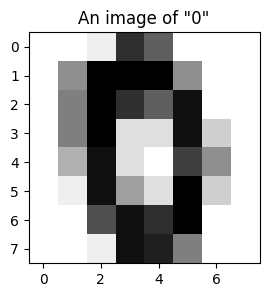

In [4]:
# display digits image
# change image_index and see each image with its label

images = d.images # images ("list of array"-like)
target = d.target # corresponding label numbers

image_index = 72
plt.figure(1, figsize=(3, 3))
plt.imshow(images[image_index], cmap=plt.cm.gray_r)
plt.title(f'An image of "{target[image_index]}"')
plt.show()

<!-- JPN -->
さて、これら0〜9の数字について、
* どの数字とどの数字は互いに似ていて、どの数字とどの数字は互いに似ていないだろうか。
* これらの数字が64次元の空間上にどのように分布しているかを簡単に知ることはできるだろうか。
* 8x8の画像のうち、データを特徴付けるのはどの部分だろうか。

これらのことを知ることができる手法の一つが主成分分析である。

<!-- ENG -->
Now, for these numbers 0 through 9,
* Which numbers would be similar to each other and which numbers would not be similar to each other?
* Can we easily find out how these numbers are distributed over a 64-dimensional space?
* Which part of the 8x8 image characterizes the data?

One of the methods that can tell us these features is principal component analysis (PCA).

---

<!-- JPN -->
##### 課題 1
　digitsデータセットについて、
1. 画像の総枚数 `n_images`
2. 件数が最も少ない数字 `fewest_number` （最も少ないものが複数ある場合、そのうちの最も値が小さい数字）

を求めるプログラムを作成せよ。

<!-- ENG -->
##### Exercise 1
　Make a code and obtain values regarding the digits data set:
1. Total number of images `n_images`
2. The number which has the fewest data items `fewest_number` (if there are multiple numbers with the fewest count, the lowest value among them)


In [24]:
# CODE CELL FOR YOUR ANSWER

from sklearn import datasets
d = datasets.load_digits()
images = d.images

n_images = len(d.target)

name_images = d.target

print(f"Total number of images is {n_images}")

count_list = [0] * 10

for num in name_images:
    count_list[num] += 1

for i in range(10):
    print(f"Number {i}: {count_list[i]}")

count_list = [count_list[i] for i in range(10)]

min_count = min(count_list)

fewest_number= [i for i, count in enumerate(count_list) if count == min_count]

print(count_list)

print(f"The min count is {min_count}，The fewest number is {fewest_number}")

Total number of images is 1797
Number 0: 178
Number 1: 182
Number 2: 177
Number 3: 183
Number 4: 181
Number 5: 182
Number 6: 181
Number 7: 179
Number 8: 174
Number 9: 180
[178, 182, 177, 183, 181, 182, 181, 179, 174, 180]
The min count is 174，The fewest number is [8]


---

<!-- JPN -->
## 2 | 主成分分析のdigitsデータセットへの適用

<!-- ENG -->
## 2 | Applying PCA to the digits data set

<!-- JPN -->
### 2.1 | 主成分分析の実行と主成分の確認

<!-- ENG -->
### 2.1 | Executing PCA and confirming principal components

<!-- JPN -->
　主成分分析 (PCA) は可視化や次元削減などに用いられる教師なし学習手法の一つで、
データセットのばらつきの情報を保ってデータを低次元の空間に射影することができる。
まず、主成分分析を用いてデータを2次元に射影し、どの数字が空間上のどこに対応するか見てみよう。

<!-- ENG -->
　Principal component analysis (PCA) is one of the unsupervised learning methods used in visualization and dimension reduction, which can project data into a low-dimensional space while preserving information about the variability of the data set.

First, let's use PCA to project the data into two dimensions and see which numbers correspond to where in space.

In [25]:
# prepare PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 components will be used
pca.fit(data) # obtain principal component
images_map = pca.transform(data) # transform input data using PCA

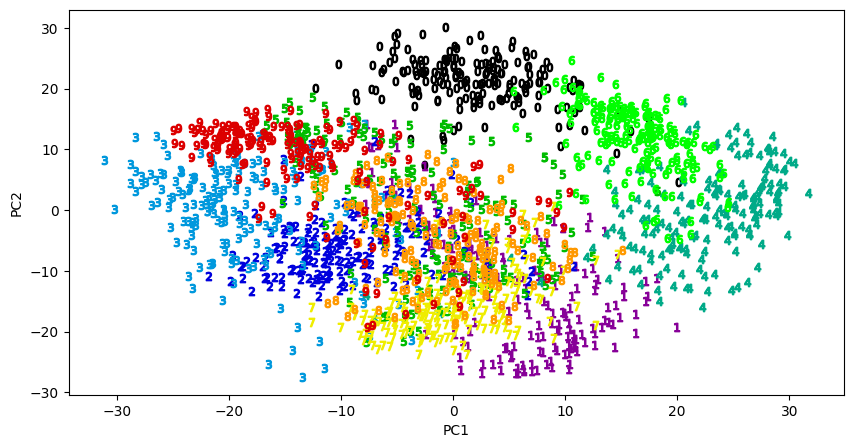

In [26]:
# scatter plot of PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
n_labels = 10

# set color palette for plot
color = [plt.cm.nipy_spectral(i/n_labels, 1) for i in range(n_labels)]

# plot by each label
for i in range(n_labels):
  plt.scatter(images_map[target==i, 0], images_map[target==i, 1],
              color=color[i], marker=f"${i}$")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<!-- JPN -->
正しく実行されていれば、最初の二つの主成分の値に沿って各数字が出力されているはずである。

上の図からどのようなことが言えるだろうか。例えば、0や4は他の数字と比較的離れた分布をしていること、5, 8, 9が近い位置に分布していることから、文字の類似関係、すなわち0と4は大きく異なるが、5, 8, 9は互いに似ている、ことなどが見て取れる。

この例では、64次元のデータを2次元に落とし込むことによって、データの分布をある程度可視化することができている。一方、数字間の重なりが大きく、2次元だけでは画像の情報を十分表現できていないこともわかる。

<!-- ENG -->
If it has executed correctly, each number should be output along the values of the first two principal components.

What can we say from the above diagram? For example, we can see that 0 and 4 are distributed relatively far from other numbers, and that 5, 8, and 9 are distributed close to each other. It means that the shape of 0 and 4 are quite different from each other while that of 5, 8, and 9 are more similar to each other.

In this example, the distribution of the data can be visualized to some extent by reducing the 64 dimensional data to two dimensions. On the other hand, there is a large overlap between the numbers, indicating that the information in the image cannot be adequately represented in two dimensions alone.

<!-- JPN -->
　また、主成分分析では、各主成分（固有ベクトル）の値を見ることで、それぞれの主成分が主にどの列から構成されているか確認することができる。

上位3つの主成分について、各主成分の内訳を見てみよう。

<!-- ENG -->
　Also, in PCA, by looking at the value of each principal component (eigenvector), it is possible to check which columns each principal component is mainly composed of.

Let's take a look at the breakdown of each of the top three principal components.

In [27]:
import pandas as pd

pca = PCA(n_components=3).fit(data) # PCA, use 3 components
components = pca.components_ # get components from PCA result

indexes = ["PC1", "PC2", "PC3"]
print(pd.DataFrame(components, index=indexes)) # print shaped result

               0         1         2         3         4         5         6   \
PC1 -3.779122e-17 -0.017309 -0.223429 -0.135913 -0.033032 -0.096634 -0.008329   
PC2 -7.369471e-17 -0.010106 -0.049085 -0.009433 -0.053602 -0.117755 -0.062128   
PC3  8.762569e-18  0.018342  0.126476  0.132155 -0.134016 -0.264939 -0.116644   

           7         8         9   ...        54        55        56  \
PC1  0.002269 -0.000321 -0.119309  ... -0.063288  0.000962  0.000010   
PC2 -0.007936 -0.000163 -0.021017  ...  0.148776  0.000542 -0.000033   
PC3 -0.016842  0.000394  0.079437  ...  0.222787  0.021862 -0.000014   

           57        58        59        60        61        62        63  
PC1 -0.014079 -0.235675 -0.141226 -0.009160 -0.089418 -0.036598 -0.011468  
PC2 -0.010079 -0.070272  0.017111  0.194296  0.176697  0.019455 -0.006697  
PC3  0.017583  0.123158  0.098353  0.138485  0.232084  0.167027  0.034804  

[3 rows x 64 columns]


<!-- JPN -->
　これでは全体の様子がよくわからないので、固有ベクトルを画像と同じ形式に直し、値の大小を色で表して可視化してみよう。

<!-- ENG -->
　Since this doesn't give us a clear picture of everything, let's visualize it by reformatting the eigenvectors into the same format as the image and using colors to indicate the size of the values.

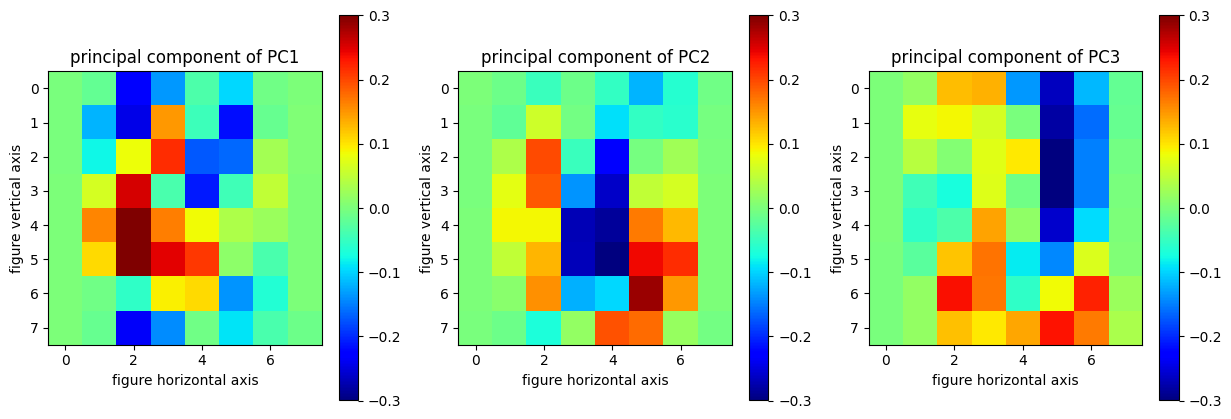

In [28]:
# show components on image

import numpy as np
fig = plt.figure(figsize=(15, 5))
for i in range(3): # for each component:

  plt.subplot(1, 3, i+1) # Draw a diagram by dividing it into three parts. When i=0, the leftmost (i+1 = 1st).
  components_reshape = np.reshape(components[i], images[0].shape) # 1D vector -> 2D image-like format

  im = plt.imshow(components_reshape, cmap=plt.cm.jet)
  im.set_clim(-0.3,0.3) # set color range
  plt.title(f"principal component of PC{i+1}")
  plt.xlabel("figure horizontal axis")
  plt.ylabel("figure vertical axis")

  plt.colorbar()

plt.show()

<!-- JPN -->
　ここで、固有ベクトルの各値の**符号の正負ではなく**、値の**絶対値**が大きい説明変数がデータの分散をより表現しているといえることに注意する必要がある。

<!-- ENG -->
　Here, it should be noted that the explanatory variables with larger **absolute values** can be said to be more expressive of the variance of the data, **rather than the positive or negative sign** of each value of the eigenvector.

<!-- JPN -->
　各主成分の寄与率 （explained variance ratio） は、元のデータの分散（$=$分散共分散行列の固有値の合計）のうちどれだけの割合をその主成分（に対応する固有値）が持っているかに相当する。実際に上位5つの主成分を用いて寄与率を見てみよう。

<!-- ENG -->
　The explained variance ratio of each principal component corresponds to how much of the variance of the original data (i.e., the sum of the eigenvalues of the covariance matrix) the principal component (and its corresponding eigenvalue) has. Let's actually look at the explained variance ratio using the top five principal components.

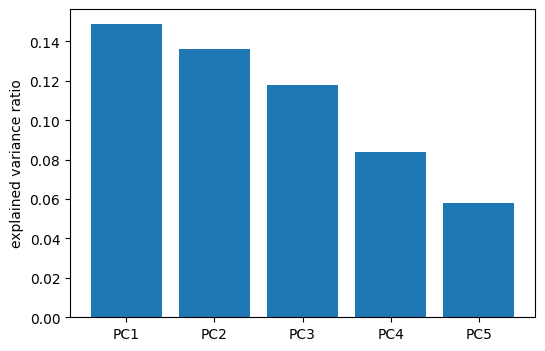

In [29]:
n_components = 5
fig = plt.figure(figsize=(6,4))

pca = PCA(n_components=n_components).fit(data) # PCA, use 5 components
explained_variance = pca.explained_variance_ratio_ # explained ratios
indexes = [f"PC{i+1}" for i in range(len(explained_variance))]
plt.bar(np.arange(len(explained_variance)), explained_variance,
        tick_label=indexes)
plt.ylabel("explained variance ratio")
plt.show()

<!-- JPN -->
同様に、累積の寄与率は以下のようになる。

<!-- ENG -->
Similarly, the cumulative explained variance ratio is as follows.

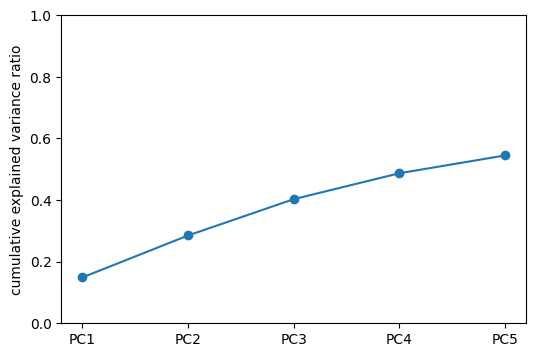

In [30]:
fig = plt.figure(figsize=(6,4))
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(np.arange(len(cumulative_explained_variance)),
         cumulative_explained_variance, marker="o")
plt.xticks(range(len(indexes)), indexes)
plt.ylim(0, 1)
plt.ylabel("cumulative explained variance ratio")
plt.show()

<!-- JPN -->
主成分分析では固有値を大きい順に用いるので、寄与率は徐々に減少していく。

すべての主成分の寄与率の合計は1になるので、累積の寄与率をいくつの主成分を用いるかの基準として用いることができる。この場合、累積の寄与率の目安として0.7や0.8が用いられることがある。

<!-- ENG -->
In PCA, eigenvalues are used in order of increasing value, so the explained variance ratio gradually decreases.

Since the explained variance ratio total of all principal components is 1, the cumulative explained variance ratio can be used as a criterion to determine how many principal components to use. In this case, 0.7 or 0.8 is sometimes used as an approximate estimate of the cumulative explained variance ratio.

<!-- BOTH -->
-----

<!-- JPN -->
##### 課題 2
　上の主成分分析の結果から、digitsデータセットの画像はどのような特徴があると言えるだろうか。複数の主成分について別々に考察せよ。また、3つの主成分でdigitsデータセットを表現することは十分だろうか。

<!-- ENG -->
##### Exercise 2
　Based on the results of the PCA above, what characteristics can you say about the images in the digits data set? Discuss several principal components separately.
Also, is it sufficient to represent the digits data set with three principal components?

<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

The PCA analysis shows that certain digits, such as 0 and 4, are distributed far apart from other digits in the reduced two-dimensional space, indicating that their shapes are notably different. Conversely, digits 5, 8, and 9 are clustered close together, suggesting similarities in their shapes.

Although PCA helps visualize data in two dimensions, there is significant overlap among the digits, indicating that critical information in the images cannot be fully captured in just two dimensions.

So, it's still not sufficient to represent the digits dataset with just three principal components. While using three principal components will provide a better representation than just two, it's still a highly simplified projection of the data. The digits dataset is originally composed of 64 dimensions, and reducing it to just three dimensions is likely to result in a significant loss of information.

---

<!-- JPN -->
##### 課題 3
　主成分分析を行う際には、中心化と言って、まず各変数の平均が0になるように前処理する（**補足資料 ※1**）。例えば今回の画像のケースの場合、一番左上の画素 (pixel) の値について、データセット内での平均を0にするような操作である。

　scikit-learnの `PCA()` では中心化を自動でやってくれているのだが、その具体的な処理について知っておこう。下のコードは入力されたデータセット（データの集合）に対して中心化を行う関数 `centering(X)` である。これを用いて `d.data` を中心化し `centered_data` に格納せよ。また、`centered_data` の 中心化した各変数の平均値 `mean_centered_data` および 中心化した各変数の標準偏差 `std_centered_data` を計算せよ。


<!-- ENG -->
##### Exercise 3
　When conducting PCA, pre-processing is performed so that the mean of each variable becomes zero, called centering (**Supplementary Material S1**). For example, in the case of this image, it is an operation that sets the average value of the top left pixel to 0 in the data set.
　`PCA()` in scikit-learn does the centering automatically, but let's get to know the specific process. The code below shows the function `centering(X)` that performs centering on the input data set (set of data). Perform centering of `d.data`, and assign to a variable `centered_data`. Furthermore, calculate mean and standard deviation of each features (`mean_centered_data` and `std_centered_data`).

In [31]:
def centering(X):
  return X - np.mean(X, axis=0)

In [36]:
# CODE CELL FOR YOUR ANSWER

centered_data =  centering(d.data)

mean_centered_data = np.mean(centered_data, axis=0)

std_centered_data = np.std(centered_data, axis=0)

print(centered_data)
print(mean_centered_data)
print(std_centered_data)

[[ 0.         -0.30383973 -0.20478575 ... -6.7640512  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -5.20478575 ...  3.2359488  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -5.20478575 ...  9.2359488   6.93210907
  -0.36449638]
 ...
 [ 0.         -0.30383973 -4.20478575 ... -0.7640512  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -3.20478575 ...  5.2359488  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973  4.79521425 ...  5.2359488  -1.06789093
  -0.36449638]]
[ 0.00000000e+00 -1.23910033e-15  4.92378042e-15  3.92044030e-15
  1.36118162e-15 -1.73286229e-15 -1.47214214e-15 -4.54993738e-16
 -5.88087669e-18  5.09442238e-15  1.78920750e-15 -1.86828850e-15
  5.33005903e-15 -7.62835043e-15  2.86989872e-15  5.59220017e-16
  3.26460092e-17  3.32535582e-15  1.96615123e-15 -3.14050399e-15
  5.26580572e-15  2.44508550e-15 -2.36130907e-16 -4.61071545e-16
 -1.87662907e-18 -1.02063909e-15 -2.78365101e-15 -3.34908012e-15
 -3.08514730e-15 -4.52738694e-15 -4.62722669e-15 -1.0

<!-- BOTH -->
-----

<img src=https://i.imgur.com/6fIRudq.png width=200px>

<!-- JPN -->
## 3 | 主成分からの再構築

<!-- ENG -->
## 3 | Reconstructing from principal components

<!-- JPN -->
　主成分分析を用いた次元削減における情報落ち (loss of information) について、より詳しく見てみよう。主成分分析を行った後、いくつかの主成分だけを残すことによって、元の行列をより小さい次元で近似することができる。このとき、元のデータの情報はどの程度残っているのだろうか。これは主成分分析で次元削減を行い、その結果に逆変換を行ってデータを元の形式に戻すことによって視覚的に確認することができる。


<!-- ENG -->
　Let's take a closer look at the loss of information in dimension reduction using principal component analysis (PCA). After performing PCA, the original matrix can be approximated in a smaller dimension by keeping only a few principal components. At this point, how much of the original data information remains? This can be visually confirmed by performing dimension reduction with PCA and then performing an inversion on the results to return the data to its original format.

<!-- JPN -->
　下のセル群を `n_components` を変えながら何度か実行することで、使用した次元数と復元後の関係を見ることができる。復元の精度が良いほど、より多くの情報が残っているといえる。

　下のセル群のうち、上のセルが変換・逆変換を行う関数で、下の2セルがプロットする部分である。`n_components` で削減する次元数を、`image_index` で表示する画像を指定することができる。元の画像が64次元であるため、`n_components` には1以上64以下の値を指定すること。

<!-- ENG -->
　By running the group of cells below several times with different `n_components`, we can see the relationship between the number of dimensions used and the results after the restoration. The better the accuracy of the restoration is, the more information remains.

　In the group of cells below, the top cell is the function that performs the transformation and inversion, and the bottom two cells are the part that performs plotting. The number of dimensions to be reduced can be specified by `n_components`, and the number of the images to be displayed can be specified by `image_index`. Since the original image is 64 dimensions, specify a value between 1 and 64 for `n_components`.

In [32]:
def project_reconstruct(data, n_components):
  pca = PCA(n_components=n_components)
  pca.fit(data)
  data_map = pca.transform(data) # projection
  data_reconstructed = pca.inverse_transform(data_map) # reconstruction
  sum_explained_variance_ratio = np.sum(pca.explained_variance_ratio_)

  return data_reconstructed, sum_explained_variance_ratio

In [33]:
data = datasets.load_digits().data
# project and reconstruct of data by PCA
n_components = 3 # the number of components to be used

data_reconstructed, sum_explained_variance_ratio = \
  project_reconstruct(data, n_components)
print(f"Cumulative explained variance ratio: {sum_explained_variance_ratio:.4f}")

Cumulative explained variance ratio: 0.4030


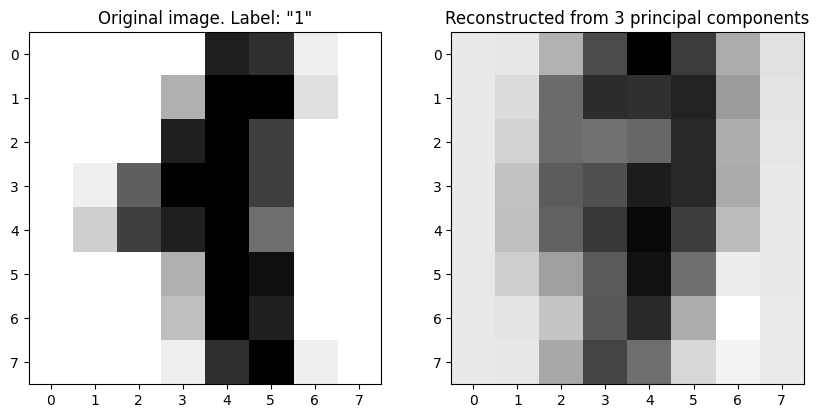

In [34]:
# show above result
image_index = 11 # the index of image to be shown
image_reconstructed = np.reshape(data_reconstructed[image_index],
                                 images[0].shape)

fig = plt.figure(figsize=(10, 5))

# show original image
plt.subplot(1, 2, 1)
plt.imshow(images[image_index], cmap=plt.cm.gray_r)
plt.title(f'Original image. Label: "{target[image_index]}"')

# show reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap=plt.cm.gray_r)
plt.title(f"Reconstructed from {n_components} principal components")

plt.show()

<!-- JPN -->
実行した結果から、残した次元数が多いほど復元の精度が良い、つまり情報が多く残っていることが見て取れるはずである。

　このように、元々のデータが視覚的に捉えられる場合には、実際に復元してみることでも使用するべき主成分の数を判断することができる。

<!-- ENG -->
From the execution result, it can be seen that the greater the number of dimensions left, the better the accuracy of restoration is, which means the more information remains.

　In this way, if the original data can be captured visually, the number of principal components that should be used can be determined even by actually restoring the data.

---

<!-- JPN -->
## 4 | 主成分分析における分散共分散行列の固有値

　主成分分析で用いる主成分およびその寄与は元のデータの分散共分散行列（単に共分散行列とも言う）の固有ベクトルおよび固有値から求めることができる。`PCA.fit`では「分散共分散行列の固有ベクトルおよび固有値を計算し、大きい順に並べ替えて答える」ことに相当する処理（**補足資料 ※2**）を行なっている。

　ここではこの計算を**scikit-learnを通さず**行い、scikit-learnの主成分分析と同様の結果が得られることを確認する。

<!-- ENG -->
## 4 | Eigenvalues ​​of the variance-covariance matrix in PCA

　The principal components and their explained variance ratio used in principal component analysis (PCA) can be obtained from the eigenvectors and eigenvalues of the variance-covariance matrix (also called simply the covariance matrix) of the original data. `PCA.fit` performs a process equivalent to "calculate the eigenvectors and eigenvalues of the variance-covariance matrix, output them by sorting in order of magnitude" (**Supplementary Material S2**).

　In this section, we will perform this calculation **without going through scikit-learn** and confirm that the results are similar to PCA in scikit-learn.

In [37]:
# The same function as that of Exercise 3
def centering(X):
  return X - np.mean(X, axis=0)

In [38]:
# Calculate covariance matrix
data_centered = centering(data)
cov_matrix = np.cov(data_centered, rowvar=False)

In [39]:
# Calculate eigenvalue/eigenvector of covariance matrix
from numpy.linalg import eig
eig_val, eig_vec = eig(cov_matrix)

# Sort by eigenvector (descending)
n_components = 3
eig_index = np.argsort(eig_val)      # argsort arranges the index in ascending order by element
eig_index = eig_index[::-1]          # Reverse the order with [::-1] to get the descending order
eig_index = eig_index[:n_components] # Get only n_components index in descending order
eig_val = eig_val[eig_index]         # Get eigenvalues in increasing order
eig_vec = eig_vec.T[eig_index]       # Get the corresponding eigenvector

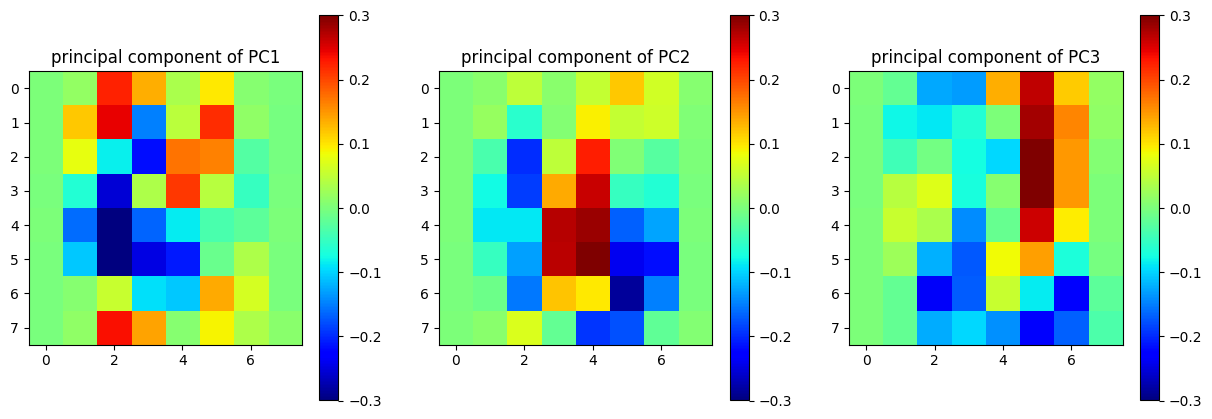

In [40]:
# show

fig = plt.figure(figsize=(15, 5))
for i in range(n_components):

  plt.subplot(1, n_components, i+1)
  eig_vec_reshape = np.reshape(eig_vec[i], images[0].shape)

  im = plt.imshow(eig_vec_reshape, cmap=plt.cm.jet)
  im.set_clim(-0.3,0.3)
  plt.title(f"principal component of PC{i+1}")
  plt.colorbar()

plt.show()

<!-- JPN -->
　主成分（固有ベクトル）を見ることにより、scikit-learnの `PCA` と同様の結果になっていることが確認できる。
なお、主成分の符号が反転している場合があるが、ベクトルの向きが反対になっているだけで表している意味は同じである。

<!-- ENG -->
　By looking at the principal components (eigenvectors), we can confirm that the results are similar to `PCA` in scikit-learn.
In some cases, the sign of the principal component is reversed, but the meaning is the same, just that the direction of the vector is opposite.

---

<!-- JPN -->
##### 課題 4
　`PCA()` で計算された主成分と、 NumPyで計算した分散共分散行列の固有ベクトルが一致していることは確認できた。今度は、NumPyで計算された分散共分散行列の固有値が 主成分分析における各主成分の寄与率と対応していることを確認する。

　`PCA()` を使わずに、第3主成分までのそれぞれの寄与率 `explained_variance_ratio` を計算せよ。

<!-- ENG -->
##### Exercise 4
　Now that we have confirmed that the eigenvectors of covariance matrix are the same as principal components of PCA, let's make sure that the eigenvalues of covariance matrix can be associated with the explained variance ratios of PCA.

　Calculate `explained_variance_ratio` of the top three principal components without using `PCA()`.


In [41]:
# CODE CELL FOR YOUR ANSWER
from sklearn import datasets
from numpy.linalg import eig

data = datasets.load_digits().data
data_centered = centering(data)
cov_matrix = np.cov(data_centered, rowvar=False)
eig_val, eig_vec = eig(cov_matrix)
n_components = 3

sorted_eig_val = np.sort(eig_val)[::-1][:n_components]

total_variance = np.sum(eig_val)

explained_variance_ratio = sorted_eig_val / total_variance

print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.14890594 0.13618771 0.11794594]


<!-- BOTH -->
-----

<!-- JPN -->
##### 課題 5
データセット内の**先頭の画像**（0番目の画像："0"という文字のはずである）に対して**sciki-learnを通さずに**3次元の主成分得点 `pc_scores` を求めよ。

<!-- ENG -->
##### Exercise 5
Let's find the three principal component scores `pc_scores` for the **first image** (the 0th image, it should be a character of "0") in the dataset **without scikit-learn**.

In [42]:
# CODE CELL FOR YOUR ANSWER

from sklearn import datasets
from numpy.linalg import eig

data = datasets.load_digits().data
data_centered = centering(data)
cov_matrix = np.cov(data_centered, rowvar=False)
eig_val, eig_vec = eig(cov_matrix)
n_components = 3

total_eig_val = np.sum(eig_val)
eig_index = np.argsort(eig_val)
eig_index = eig_index[::-1]
eig_index = eig_index[:n_components]
eig_val = eig_val[eig_index]
eig_vec = eig_vec.T[eig_index]

top_eig_vec = eig_vec[:n_components]
image = data[0]
pc_scores = np.dot(top_eig_vec, image)

print("Principal Component Scores:", pc_scores)

Principal Component Scores: [  0.92867919 -19.55461647   6.93233315]


---

<!-- JPN -->
# 補足資料

<!-- ENG -->
# Supplementary Material

<!-- JPN -->
### ※1 主成分分析の中心化について

　主成分分析では中心化が行われるが、正規化（平均を 0、分散を 1 にする）ではないのか？と思われる人もいるだろう。これは良い発想で、分散を 1 にする方が良い場合と良くない場合がある。[scikit-learnのPCAのドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)によれば、（データの大きさを揃えることで）変換されたデータの分散の大きさの情報が失われるが、機械学習の入力として用いる場合は予測精度が向上する可能性がある。


<!-- ENG -->
### S1 PCA centering

　In PCA, centering is executed, but isn't it normalization (making the mean zero and the variance one)? Some people may think so. This is a good idea, and there are cases where setting the variance to 1 is okay and not okay. According to [scikit-learn's PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), information about the magnitude of the variance of the transformed data (by aligning the size of the data) is lost, but this may improve prediction accuracy when used as input for machine learning.

<!-- JPN -->
### ※2 実際の `PCA.fit()` で行われている処理

　実際には、`PCA.fit()` では分散共分散行列の固有値・固有ベクトルを求める処理の代わりに、元の行列の特異値分解の結果から分散共分散行列の固有値・固有ベクトルを求めている。 詳細は[実装](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/decomposition/_pca.py)などを参照。

<!-- ENG -->
### S2 Actual processing performed in `PCA.fit()`

　In fact, `PCA.fit()` finds the eigenvalues ​​and eigenvectors of the variance-covariance matrix from the results of the singular value decomposition of the original matrix, instead of finding the eigenvalues ​​and eigenvectors of the variance-covariance matrix. For more details, see [the actual code](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/decomposition/_pca.py).